<a href="https://colab.research.google.com/github/halepz/test/blob/master/Take_home_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = ("https://raw.githubusercontent.com/halepz/test/master/test.csv")
test = pd.read_csv(url, sep = '|')

url = ("https://raw.githubusercontent.com/halepz/test/master/train.csv")
train = pd.read_csv(url, sep = '|')

In [3]:
train.head().T

,0,1,2,3,4
id,465,174,502,579,530
school,MS,GP,MS,MS,MS
sex,F,M,M,M,M
age,18,17,17,18,17
address,U,R,R,U,U
famsize,GT3,LE3,LE3,LE3,GT3
Pstatus,T,T,T,T,T
Medu,1,2,2,1,3
Fedu,2,1,2,3,3
Mjob,other,at_home,services,at_home,services


In [4]:
train.dtypes

id             int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
pass            bool
dtype: object

In [5]:
train["pass"].value_counts()

True     499
False     50
Name: pass, dtype: int64

In [6]:
train.isna().sum()

id            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
pass          0
dtype: int64

In [7]:
test.isna().sum()

id            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

In [8]:
train_changes = train.drop(columns = "id")
print(train_changes.columns)
train_changes['pass'] = train_changes['pass'].astype(int)
# pd.get_dummies(train_changes, columns=['school', 'sex', 'address', 'Pstatus', 'guardian', 'famsize', 'reason', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic'])
print(train_changes['Mjob'].unique())
print(train_changes['Fjob'].unique())
train_changes_dm = pd.get_dummies(train_changes)
train_changes_dm.dtypes

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'pass'],
      dtype='object')
['other' 'at_home' 'services' 'health' 'teacher']
['other' 'services' 'at_home' 'health' 'teacher']


age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
pass                 int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
reason_home          uint8
reason_other         uint8
r

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train_changes_dm.drop(columns = "pass"), train_changes_dm['pass'], random_state = 123)
modelo = RandomForestClassifier(random_state = 123)
modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test = modelo.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9202898550724637

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x = train_changes_dm.drop(columns = "pass")
y = train_changes_dm['pass']
x_sm, y_sm = sm.fit_resample(x, y)
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.7)
modelo.fit(x_train_sm, y_train_sm)
y_pred_sm = modelo.predict(x_test_sm)
accuracy_score(y_test_sm, y_pred_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.9513590844062947

In [12]:
from sklearn.model_selection import KFold, cross_val_score

kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
for train_index, test_index in kf.split(x_sm, y_sm):
    cnt += 1

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

score = cross_val_score(modelo, x_sm, y_sm, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.985      0.95       0.965      0.98492462 0.95477387]
Average score: 0.97


In [13]:
from xgboost.sklearn import XGBClassifier

clf = XGBClassifier(n_estimators=10, random_state=1, n_jobs=-1)

score = cross_val_score(clf, x_sm, y_sm, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.865      0.845      0.85       0.88944724 0.89949749]
Average score: 0.87


In [17]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

base_model = modelo
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_sm, y_train_sm)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [18]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [22]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    y_pred_test = model.predict(test_features)
    accuracy = accuracy_score(test_labels, y_pred_test) 
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model.fit(x_train_sm, y_train_sm)
base_accuracy = evaluate(base_model, x_test_sm, y_test_sm)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test_sm, y_test_sm)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.95%.
Model Performance
Accuracy = 0.96%.
Improvement of 1.35%.


In [23]:
score = cross_val_score(base_model, x_sm, y_sm, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

score_best = cross_val_score(best_random, x_sm, y_sm, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score_best}')
print(f'Average score: {"{:.2f}".format(score_best.mean())}')

print('Improvement of {:0.2f}%.'.format( 100 * (score_best.mean() - score.mean()) / score.mean()))

Scores for each fold are: [0.985      0.95       0.965      0.98492462 0.95477387]
Average score: 0.97
Scores for each fold are: [0.98       0.95       0.96       0.98492462 0.95477387]
Average score: 0.97
Improvement of -0.21%.


[0.02808832 0.02313703 0.02219388 0.02647066 0.02434117 0.06075983
 0.03059634 0.02764576 0.03448719 0.03046041 0.02492892 0.02241461
 0.03447682 0.02102067 0.02102529 0.01832351 0.01969502 0.01796812
 0.01651744 0.01468818 0.01771733 0.00749949 0.00779463 0.01184171
 0.00496304 0.01697105 0.01231059 0.00465822 0.00541739 0.00256783
 0.01859366 0.01759071 0.00226271 0.02184474 0.01604062 0.0213721
 0.01014205 0.0121006  0.01434858 0.00834224 0.01408314 0.01054992
 0.01966236 0.01804802 0.00984235 0.01025445 0.01645352 0.01457261
 0.01816611 0.01229279 0.02542257 0.02259206 0.01539866 0.01280968
 0.01428757 0.0119457 ]


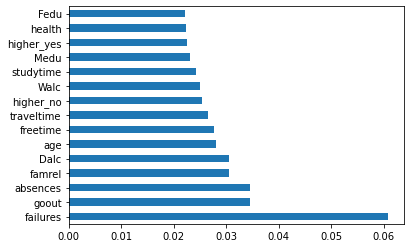

In [14]:
%matplotlib inline
X = train_changes_dm.drop(columns = "pass")  #independent columns
y = train_changes_dm['pass']   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [16]:
train_changes_dm_select = train_changes_dm[['failures', 'goout', 'Dalc', 'famrel', 'absences', 'Walc', 'traveltime', 'reason_other', 'freetime','pass']]

modelo_select = RandomForestClassifier (random_state=42)

sm = SMOTE(random_state=42)
x_select = train_changes_dm_select.drop(columns = "pass")
y_select = train_changes_dm_select['pass']
x_select_sm, y_select_sm = sm.fit_resample(x_select, y_select)
x_select_train_sm, x_select_test_sm, y_select_train_sm, y_select_test_sm = train_test_split(x_select_sm, y_select_sm, test_size=0.1)
modelo_select.fit(x_select_train_sm, y_select_train_sm)
y_pred_sm = modelo_select.predict(x_select_test_sm)
accuracy_score(y_pred_sm, y_select_test_sm)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x_select_sm, y_select_sm):
    cnt += 1

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

score = cross_val_score(modelo_select, x_select_sm, y_select_sm, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(clf,  x_select_sm, y_select_sm, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Scores for each fold are: [0.85       0.89       0.82       0.87939698 0.83417085]
Average score: 0.85
Scores for each fold are: [0.72       0.775      0.685      0.63316583 0.75376884]
Average score: 0.71


In [44]:
train_changes = test.drop(columns = "id")
test_changes_dm = pd.get_dummies(train_changes)
y_hats = modelo.predict(test_changes_dm)
test_changes_dm['preds'] = y_hats
prediction = pd.merge(test["id"],test_changes_dm[['preds']],how = 'left',left_index = True, right_index = True)
prediction.to_csv("prediction.csv", index = False)
prediction 

,id,preds
0,523,1
1,491,0
2,597,0
3,581,1
4,131,1
...,...,...
95,300,1
96,228,1
97,206,1
98,164,1
